### Final Project: Analyzing Online Popularity of Mashable Articles
Priyanka Bijlani

University of Washington - DATA 512

### Introduction

#### Motivation
This report analyzes articles published by Mashable in a period of two years. The goal of this exploratory analysis is to determine which types of articles are more popular on online platforms. Through this analysis, I want to understand if there are certain criteria for maximizing the impact of an article in terms of shares. This is an interesting topic because it is known that social media plays a role in changing people's perspectives and has a significant influencing power. It would be interesting to see what types of articles receive more shares. From this analysis, I hope to learn more about the trends in news sharing and whether changing certain aspects of an article can attract more shares.

#### Data

The dataset I plan to use is the Online News Popularity Data Set from the UCI Machine Learning Repository. 
 - [Dataset](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)

This dataset has 61 features which makes it a good multivariate dataset for exploratory analysis. It also has 39797 rows or articles for analysis. There is no license available for the dataset. The dataset does not contain any content from the aricles themselves, but instead only specific statistics related to each article that were separately compiled. The articles themselves are not publicly available, therefore cannot be directly analyzed. The terms of use for this data are explicity explained [here](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#) and the citation is shown below.
 - K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.
 
This dataset contains many features that address my points of interest such as worst keyword, best keyword, day article was published, negative word count, postive word count, total shares. There is a lof of potential to find trends for aricles with high or low shares with these features. It also has a large sample of articles so that the trends found would have statistical value. Some of the ethical considerations in using this dataset are that the word classfication is dependant on the author, therefore it contains a certain level of bias. Also, there are subjective features like best and worst word which are also subject to bias since they are from the author's perspective.

#### Unknowns

The data is in a downloadable format and easily accessible. It comes in a clean and formatted csv file. In order to carry out the analysis, some data transformations will be required and outlined in the report as needed.

### Background/Related Work

Online news sharing is a common practice as people are more and more addicted to their phones. As shown in the Netflix film, The Social Dilemma, polarized news makes its way into people's news feed through complex algorithms in such a way that cannot be monitored or controlled. This becomes a serious problem in the spreading of fake news. There is a lot of responsibility on the part of news creators to be responsible in their writing so that they do not become pawns of these sophisticated algorigthms. Watching this movie made me curious about what factors influence sharing of articles. I shaped my reseach questions to explore different facets of the articles to determine whether they influence the number of shares. This analysis would reveal how authors can shape their content to attract more audiences while still maintaining a non-polar stance. The Journal of Communication article, "The Social News Gap: How News Reading and News Sharing Diverge" by Jonathan Bright talks about the same issue of polarization in online news [[1]](https://doi.org/10.1111/jcom.12232). He explains how news editors have immense power in shaping the wave of social media based on their approach to news writing and editing [[1]](https://doi.org/10.1111/jcom.12232). My research questions are designed to understand which aspects of articles are within the power of news editors and which are not. 

### Research questions

1. Does the theme of the news article affect the number of shares on an online platform? 
2. Which theme is gaining in online popularity? 
3. Is there a relationship between the polarity of the article and the number of shares it recieves?
4. Does the day an article was published impact the amount of shares it receives?

### Methodology

##### 1. Does the theme of the news article affect the number of shares on an online platform? 
To answer this question, I will conduct an exploratory data analysis on the theme features of the dataset. These features are indicator variables. Aggregating the results for each theme with visual plots will help me understand which themes recieve more shares.
##### 2. Which theme is gaining in online popularity? 
This question relates to the above question. If the theme does not have significance in number of shares, then this question does not have a definite answer. However, comparing the themes side-by-side can reveal if a particular theme is more effective in gaining online popularity over time. Plotting all the themes together over a common time axis will help  me understand a major aspect of online news popularity.
##### 3. Is there a relationship between the polarity of the article and the number of shares it recieves?
To delve into this research question, I will analyze the polarity features in the dataset. Analyzing these features will reveal insights on the role of polarization in news sharing. It will help me understand whether the tone of an article affects how namy times it is shared.
##### 4. Does the day an article was published impact the amount of shares it receives? 
This dataset contains information on which day of the week an article was shared. To answer this question, I can create a feature that groups articles into publish day based on the seven days of the week. Plotting number of shares based on this feature will help me understand whether publishers can use this feature as a marketing decision for attracting higher number of shares.

### Analysis

#### Question 1: Does the theme of the news article affect the number of shares on an online platform? 
The intent of this question is to understand whether some themes generate more shares than others. The output of this analysis will be a box plot that shows the spread of articles and the average number of shares per theme.

The following modules/packages from python must be imported to re-create the analysis and charts/plots.

In [1]:
# Import all packages for plotting/analysis
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

The dataframe below is a snapshot of the raw data imported from the csv file. This dataframe will be copied into several other dataframes for each question/analysis.

In [2]:
# Import the raw data in a pandas dataframe
df = pd.read_csv("OnlineNewsPopularity.csv")
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Question 1 uses the below features from the raw data. df1 is a filtered dataframe with only relevant features and the target variable: shares.

In [3]:
# Filter out irrelevant columns from df and save as df1
df1 = df[[' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world',' shares']]
df1

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,0.0,0.0,1.0,0.0,0.0,0.0,711
2,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,0.0,0.0,0.0,0.0,1.0,0.0,505
...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,1800
39640,0.0,0.0,0.0,1.0,0.0,0.0,1900
39641,0.0,0.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,0.0,0.0,0.0,1.0,1100


In order to aggregate the data, it must be pivoted so that each feature in df1 is condensed into a single column called 'theme.'

In [4]:
# Pivot each feature into a new column in df1 called 'theme'
df1['theme'] = np.where(df1[' data_channel_is_lifestyle']==1.0, 'lifestyle', 'Other')
df1['theme'] = np.where(df1[' data_channel_is_entertainment']==1.0, 'entertainment', df1['theme'])
df1['theme'] = np.where(df1[' data_channel_is_bus']==1.0, 'business', df1['theme'])
df1['theme'] = np.where(df1[' data_channel_is_socmed']==1.0, 'socmed', df1['theme'])
df1['theme'] = np.where(df1[' data_channel_is_tech']==1.0, 'tech', df1['theme'])
df1['theme'] = np.where(df1[' data_channel_is_world']==1.0, 'world', df1['theme'])
df1

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares,theme
0,0.0,1.0,0.0,0.0,0.0,0.0,593,entertainment
1,0.0,0.0,1.0,0.0,0.0,0.0,711,business
2,0.0,0.0,1.0,0.0,0.0,0.0,1500,business
3,0.0,1.0,0.0,0.0,0.0,0.0,1200,entertainment
4,0.0,0.0,0.0,0.0,1.0,0.0,505,tech
...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,1800,tech
39640,0.0,0.0,0.0,1.0,0.0,0.0,1900,socmed
39641,0.0,0.0,0.0,0.0,0.0,0.0,1900,Other
39642,0.0,0.0,0.0,0.0,0.0,1.0,1100,world


The dataframe is then transformed into groupings by theme, shares, and count of articles. This is done via the groupby method of aggregating sum of shares and article counts.

In [5]:
# Group by theme. Aggregate by sum of shares and count of articles
themes = df1.groupby(['theme'])[' shares'].sum().reset_index()
themesCount = df1.groupby('theme').count().reset_index()
themesCount['count'] = themesCount[' shares']
themesCount = themesCount[['theme', 'count']]
themes = themes.merge(themesCount, on='theme')
themes

,theme,shares,count
0,Other,36467793,6134
1,business,19168370,6258
2,entertainment,20962727,7057
3,lifestyle,7728777,2099
4,socmed,8431057,2323
5,tech,22568993,7346
6,world,19278735,8427


To get the average shares per article for each theme, another column needs to be added that divides shares by total article count.

In [6]:
# Get average shares per article
themes['averageShares'] = themes[' shares']/themes['count']
themes

,theme,shares,count,averageShares
0,Other,36467793,6134,5945.189599
1,business,19168370,6258,3063.018536
2,entertainment,20962727,7057,2970.487034
3,lifestyle,7728777,2099,3682.123392
4,socmed,8431057,2323,3629.383125
5,tech,22568993,7346,3072.283283
6,world,19278735,8427,2287.734069


There are articles with no theme which were earlier categorized as "Other." In order to get interpretable results, we need to filter out the 'Other' category.

In [7]:
# Filter "Other" category
themes = themes[themes['theme']!='Other']
themes

,theme,shares,count,averageShares
1,business,19168370,6258,3063.018536
2,entertainment,20962727,7057,2970.487034
3,lifestyle,7728777,2099,3682.123392
4,socmed,8431057,2323,3629.383125
5,tech,22568993,7346,3072.283283
6,world,19278735,8427,2287.734069


Use the seaborn boxplot with showfliers set to 'False' in order to remove outliers and get a clean picture of each theme's results. Save the image in png format.

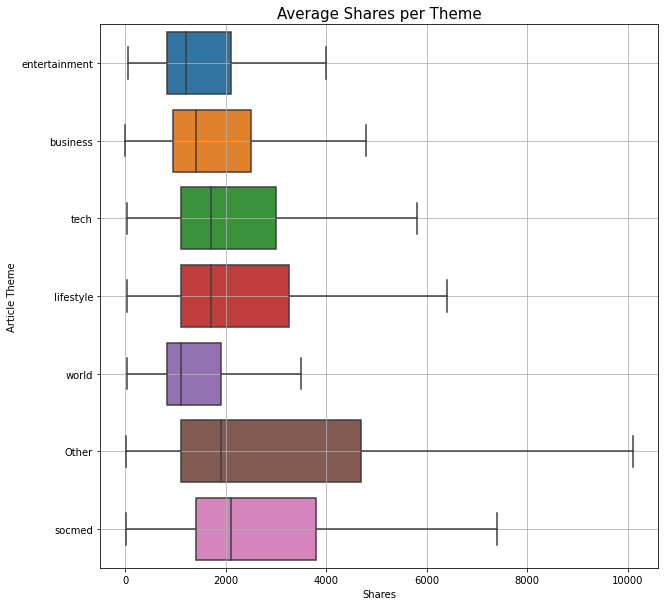

In [8]:
# Plot and save boxplot.
plt.figure(figsize=(10,10))
sns.boxplot(x=' shares', y='theme', data=df1, showfliers = False)
plt.title("Average Shares per Theme", fontsize=15)
plt.ylabel('Article Theme')
plt.xlabel('Shares')
plt.grid()
plt.savefig('SharesPerTheme.png')

#### Question 2: Which theme is gaining in online popularity? 
The intent of this question is to understand if the same theme's are consistantly popular or if some themes are gaining in popularity over time. The output of this analysis will be a plot showing the peak shares for articles from all themes over a period of 2 years.

Below is a filtered version of the raw dataframe df. It contains only columns relevant to this analysis.

In [9]:
# Filter df into df2 with relevant columns
df2 = df[['url',' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world',' shares']]
df2

,url,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,0.0,1.0,0.0,0.0,0.0,0.0,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,0.0,0.0,1.0,0.0,0.0,0.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,0.0,0.0,0.0,0.0,1.0,0.0,505
...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,0.0,0.0,0.0,0.0,1.0,0.0,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,0.0,0.0,0.0,1.0,0.0,0.0,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,0.0,0.0,0.0,0.0,0.0,0.0,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,0.0,0.0,0.0,0.0,0.0,1.0,1100


Since question 2 requires a time analysis, the date must be parsed from the url column. The code below shows the parsing and formatting of the date column.

In [10]:
# Parse and format date
df2['year'] = df2['url'].str.slice(20,24)
df2['month'] = df2['url'].str.slice(25,27)
df2['day'] = df2['url'].str.slice(28,30)
df2['date'] = df2['year']+df2['month']+df2['day']
df2

,url,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares,year,month,day,date
0,http://mashable.com/2013/01/07/amazon-instant-...,0.0,1.0,0.0,0.0,0.0,0.0,593,2013,01,07,20130107
1,http://mashable.com/2013/01/07/ap-samsung-spon...,0.0,0.0,1.0,0.0,0.0,0.0,711,2013,01,07,20130107
2,http://mashable.com/2013/01/07/apple-40-billio...,0.0,0.0,1.0,0.0,0.0,0.0,1500,2013,01,07,20130107
3,http://mashable.com/2013/01/07/astronaut-notre...,0.0,1.0,0.0,0.0,0.0,0.0,1200,2013,01,07,20130107
4,http://mashable.com/2013/01/07/att-u-verse-apps/,0.0,0.0,0.0,0.0,1.0,0.0,505,2013,01,07,20130107
...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,0.0,0.0,0.0,0.0,1.0,0.0,1800,2014,12,27,20141227
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,0.0,0.0,0.0,1.0,0.0,0.0,1900,2014,12,27,20141227
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,0.0,0.0,0.0,0.0,0.0,0.0,1900,2014,12,27,20141227
39642,http://mashable.com/2014/12/27/ukraine-blasts/,0.0,0.0,0.0,0.0,0.0,1.0,1100,2014,12,27,20141227


The method below is created to parse the theme from the features in the dataset. It filters the dataframe so that each article has only one theme.

In [11]:
# Define a method to create dataframe for all the articles in each theme
def plotTheme(df0, theme):
    column = ' data_channel_is_'+theme
    final_df = df0[df0[column]==1.0]
    return final_df

The code below is used to convert the date column into a pandas datetime column type so that it can be plotted on a time axis.

In [12]:
# Convert to datetime
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')

In [13]:
# Use the above method on each theme
lifestyleTheme = plotTheme(df2,'lifestyle')
entertainmentTheme = plotTheme(df2,'entertainment')
busTheme = plotTheme(df2,'bus')
socmedTheme = plotTheme(df2,'socmed')
techTheme = plotTheme(df2,'tech')
worldTheme = plotTheme(df2,'world')

The plots below show each theme over a common time axis. The density of the plots provide insight into the increasing/decreasing popularity for each theme. The second plot shows peaks of shares for each theme. It can be clearly seen that some themes have larger color prescence in this plot over others indicating their gaining popularity.

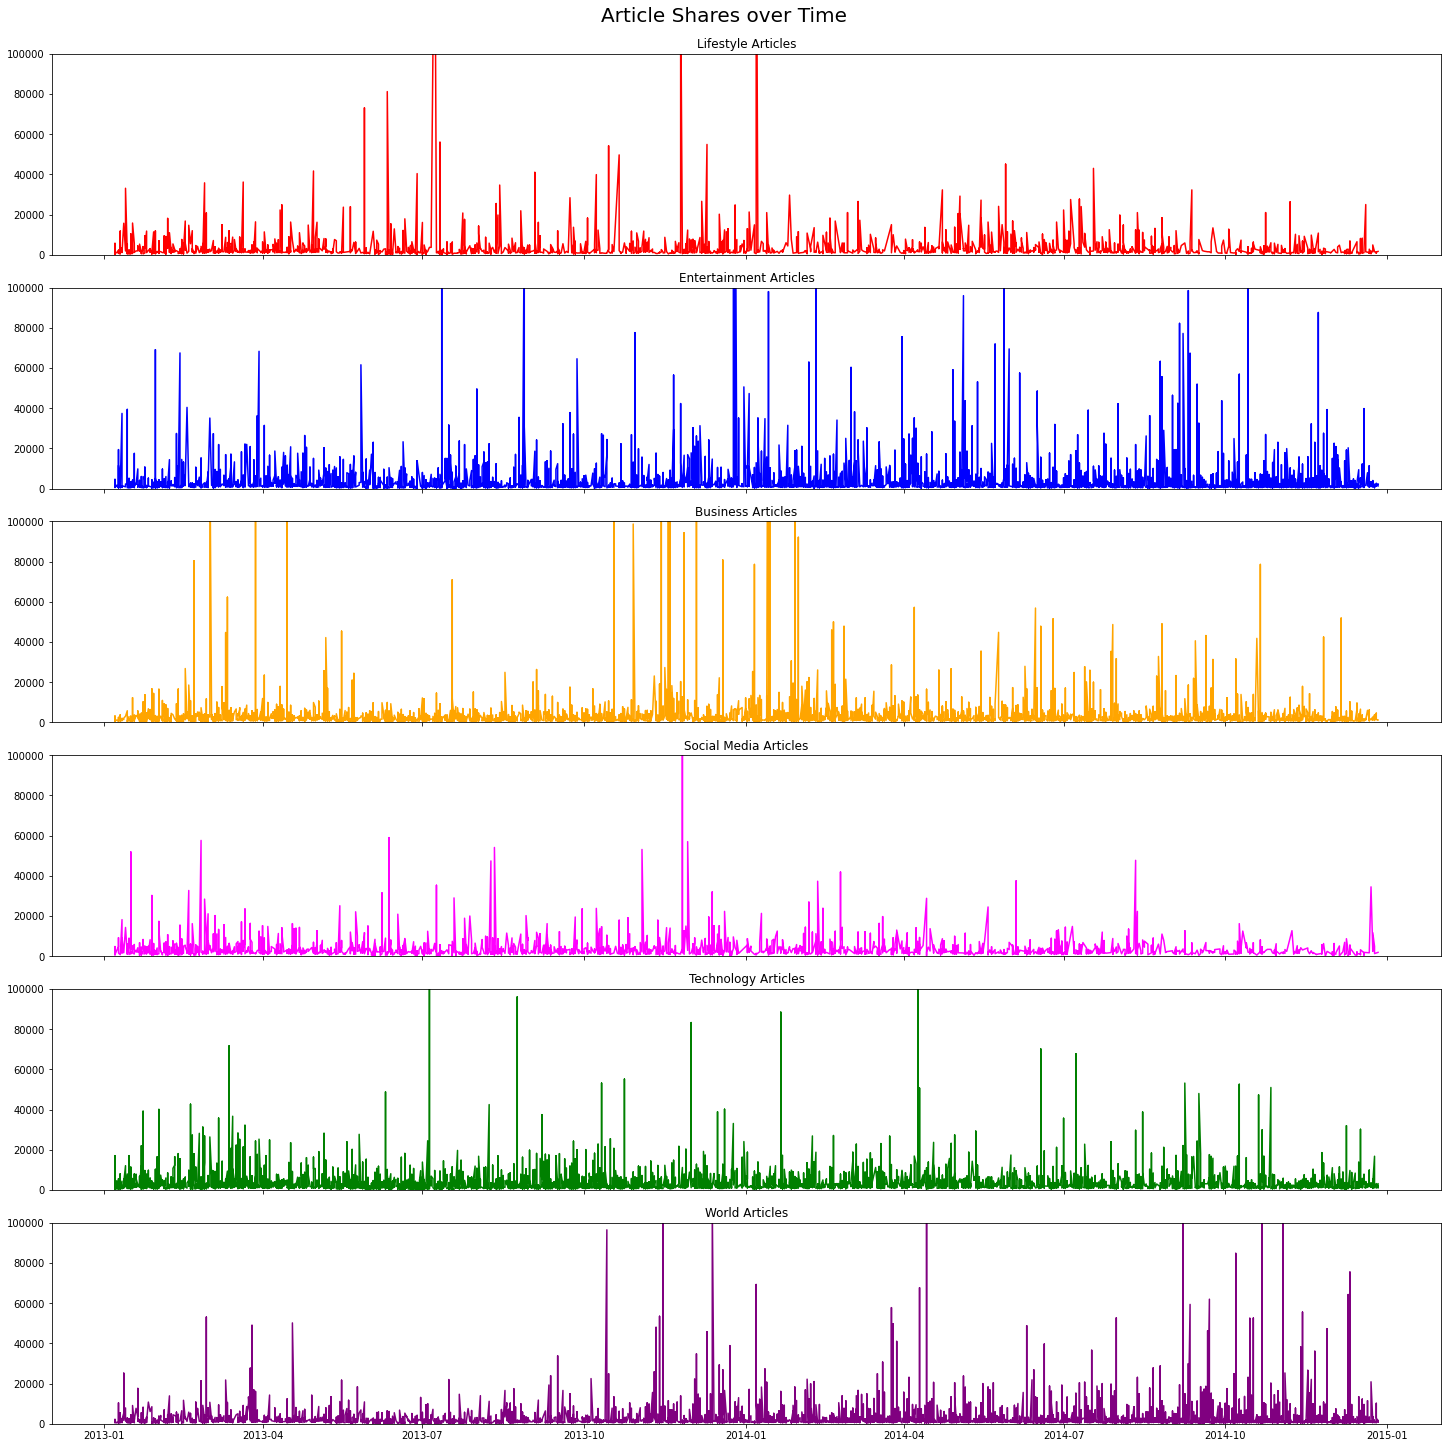

In [14]:
# Plot shares over time for each theme.
fig, axs = plt.subplots(6, figsize=(20, 20), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle("Article Shares over Time", fontsize=20)
axs[0].set_ylim([0, 100000])
axs[0].set_title('Lifestyle Articles')
axs[0].plot_date(lifestyleTheme['date'], lifestyleTheme[' shares'], linestyle='-', marker='None', label='Lifestyle', color='red')
axs[1].set_title('Entertainment Articles')
axs[1].plot_date(entertainmentTheme['date'], entertainmentTheme[' shares'], linestyle='-', marker='None', label='Entertainment', color='blue')
axs[2].set_title('Business Articles')
axs[2].plot_date(busTheme['date'], busTheme[' shares'], linestyle='-', marker='None', label='Business', color='orange')
axs[3].set_title('Social Media Articles')
axs[3].plot_date(socmedTheme['date'], socmedTheme[' shares'], linestyle='-', marker='None', label='SocialMedia', color='magenta')
axs[4].set_title('Technology Articles')
axs[4].plot_date(techTheme['date'], techTheme[' shares'], linestyle='-', marker='None', label='Technology', color='green')
axs[5].set_title('World Articles')
axs[5].plot_date(worldTheme['date'], worldTheme[' shares'], linestyle='-', marker='None', label='World', color='purple')

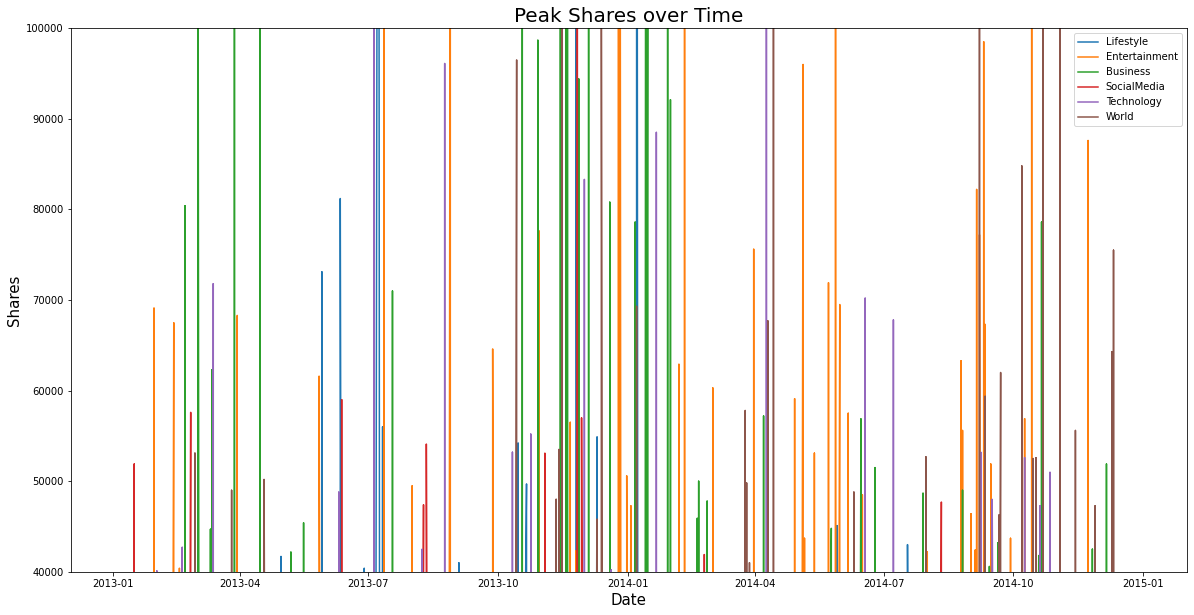

In [15]:
# Plot peaks over time for each theme
plt.figure(figsize=(20,10))
plt.title("Peak Shares over Time", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Shares', fontsize=15)
plt.plot_date(lifestyleTheme['date'], lifestyleTheme[' shares'], linestyle='-', marker='None', label='Lifestyle')
plt.plot_date(entertainmentTheme['date'], entertainmentTheme[' shares'], linestyle='-', marker='None', label='Entertainment')
plt.plot_date(busTheme['date'], busTheme[' shares'], linestyle='-', marker='None', label='Business')
plt.plot_date(socmedTheme['date'], socmedTheme[' shares'], linestyle='-', marker='None', label='SocialMedia')
plt.plot_date(techTheme['date'], techTheme[' shares'], linestyle='-', marker='None', label='Technology')
plt.plot_date(worldTheme['date'], worldTheme[' shares'], linestyle='-', marker='None', label='World')
plt.legend()
plt.ylim([40000, 100000])
plt.savefig('SharesOverTime.png')

#### Question 3: Is there a relationship between the polarity of the article and the number of shares it recieves?
The intent for this question is to understand whether the tone of an article impacts whether it recieves more shares. The output for this analysis is a linear regression of positive and negative polarity scores of articles.

The below dataframe is a filtered version of the initial dataframe with the columns relevant to this analysis.

In [16]:
# Filter df3
df3 = df[[' avg_positive_polarity',' avg_negative_polarity', ' shares']]

The rows must be filtered to remove any nuetral polarity scores for the articles. Since the question seeks to understand how postive and negative polarity affects sharing, the dataframe needs to be filtered.

In [17]:
# Remove any articles with nuetral polarity scores of 0.0
polarArticles = df3[df3[' avg_positive_polarity']!=0.0]
polarArticles = df3[df3[' avg_negative_polarity']!=0.0]
polarArticles

,avg_positive_polarity,avg_negative_polarity,shares
0,0.378636,-0.350000,593
1,0.286915,-0.118750,711
2,0.495833,-0.466667,1500
3,0.385965,-0.369697,1200
4,0.411127,-0.220192,505
...,...,...,...
39639,0.333791,-0.260000,1800
39640,0.374825,-0.211111,1900
39641,0.307273,-0.356439,1900
39642,0.236851,-0.205246,1100


The following cells plot the linear regression analysis for positive and negative polarity. The slope of the line can be interpreted as the polarity having an affect on the number of shares.

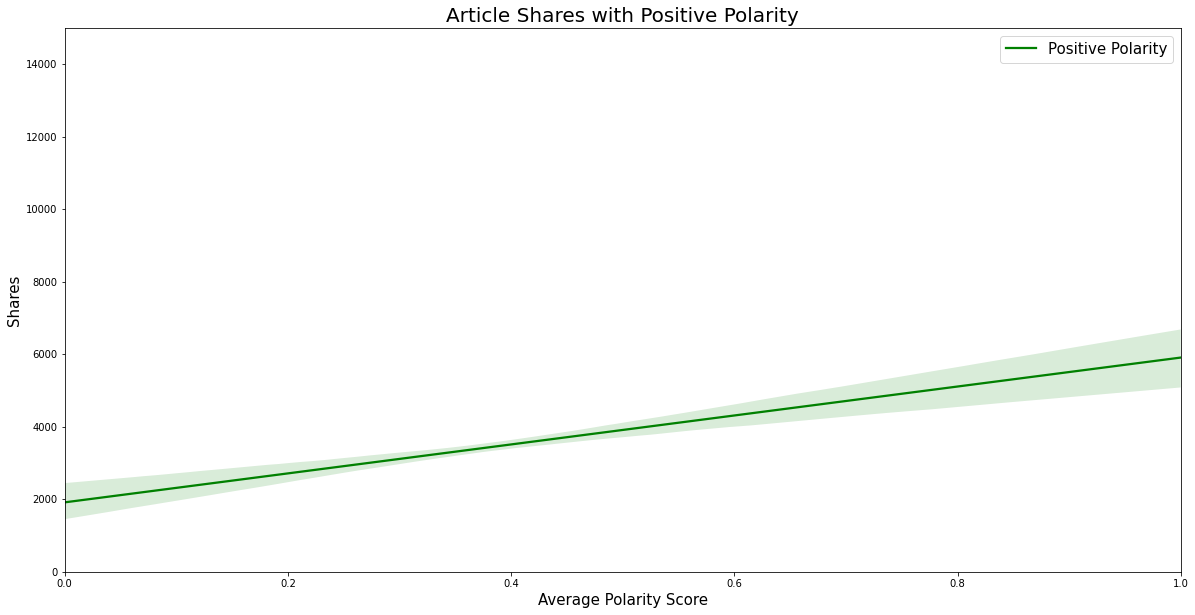

In [18]:
# Plot positive polarity regression
slope, intercept, r_value, p_value, std_err = stats.linregress(polarArticles[' avg_positive_polarity'], polarArticles[' shares'])
plt.figure(figsize=(20,10))
p = sns.regplot(polarArticles[' avg_positive_polarity'], polarArticles[' shares'], scatter=False, color='green', label='Positive Polarity')
plt.title("Article Shares with Positive Polarity", fontsize=20)
plt.xlabel('Average Polarity Score', fontsize=15)
plt.ylabel('Shares', fontsize=15)
plt.ylim([0,15000])
plt.legend(fontsize=15)
plt.savefig('PositivePolarity.png')

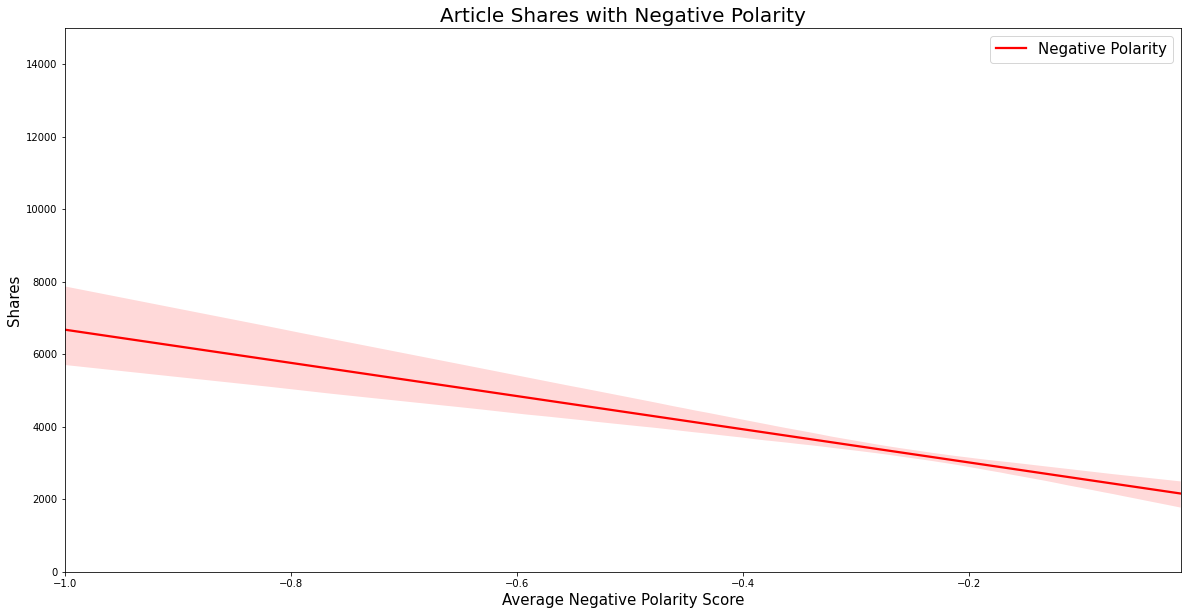

In [19]:
# Plot negative polarity regression
slope, intercept, r_value, p_value, std_err = stats.linregress(polarArticles[' avg_negative_polarity'], polarArticles[' shares'])
plt.figure(figsize=(20,10))
p = sns.regplot(polarArticles[' avg_negative_polarity'], polarArticles[' shares'], color='red', label='Negative Polarity', scatter=False)
plt.title("Article Shares with Negative Polarity", fontsize=20)
plt.xlabel('Average Negative Polarity Score', fontsize=15)
plt.ylabel('Shares', fontsize=15)
plt.ylim([0,15000])
plt.legend(fontsize=15)
plt.savefig('NegativePolarity.png')

#### Question 4: Does the day an article was published impact the amount of shares it receives?
The intent behind this question was to understand if there the number of shares varies based on when an article is published. The output of this analysis is a bar chart that shows average shares per articles based on day of publishing.

The dataframe below is a filtered version of the original dataframe with columns relevant to this analysis.

In [20]:
# Filter df4
df4 = df[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday',' shares']]
df4

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,593
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1200
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,505
...,...,...,...,...,...,...,...,...
39639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1800
39640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1900
39641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1100


The dataframe must be transformed in order to produce results showing aggregated shares per day of the week. A new column called 'dayOfWeek' is created and each article is grouped into a day based on the feature in the dataset.

In [21]:
# Create and populate column for dayOfWeek
df4['dayOfWeek'] = np.where(df4[' weekday_is_monday']==1.0, 'monday', 'Other')
df4['dayOfWeek'] = np.where(df4[' weekday_is_tuesday']==1.0, 'tuesday', df4['dayOfWeek'])
df4['dayOfWeek'] = np.where(df4[' weekday_is_wednesday']==1.0, 'wednesday', df4['dayOfWeek'])
df4['dayOfWeek'] = np.where(df4[' weekday_is_thursday']==1.0, 'thursday', df4['dayOfWeek'])
df4['dayOfWeek'] = np.where(df4[' weekday_is_friday']==1.0, 'friday', df4['dayOfWeek'])
df4['dayOfWeek'] = np.where(df4[' weekday_is_saturday']==1.0, 'saturday', df4['dayOfWeek'])
df4['dayOfWeek'] = np.where(df4[' weekday_is_sunday']==1.0, 'sunday', df4['dayOfWeek'])

The dataframe is transformed to group the data by dayOfWeek and aggregate the shares and count of articles. Then a calculation is performed on the data to produce a column for average shares per article for each day.

In [22]:
# Group and aggregate df4
weekday = df4.groupby(['dayOfWeek'])[' shares'].sum().reset_index()
weekdayCount = df4.groupby('dayOfWeek').count().reset_index()
weekdayCount['count'] = weekdayCount[' shares']
weekdayCount = weekdayCount[['dayOfWeek', 'count']]
weekday = weekday.merge(weekdayCount, on='dayOfWeek')
weekday

,dayOfWeek,shares,count
0,friday,18728817,5701
1,monday,24292839,6661
2,saturday,10003788,2453
3,sunday,10254829,2737
4,thursday,23098880,7267
5,tuesday,23666480,7390
6,wednesday,24560819,7435


In [23]:
# Add column for averageShares
weekday['averageShares'] = weekday[' shares']/weekday['count']
weekday

,dayOfWeek,shares,count,averageShares
0,friday,18728817,5701,3285.181021
1,monday,24292839,6661,3647.025822
2,saturday,10003788,2453,4078.185079
3,sunday,10254829,2737,3746.740592
4,thursday,23098880,7267,3178.599147
5,tuesday,23666480,7390,3202.500677
6,wednesday,24560819,7435,3303.405380


A seaborn bar plot is used to present the results of this analysis. The order of the days is manually sorted with the week starting on Mondays. This keeps the visual intuitive.

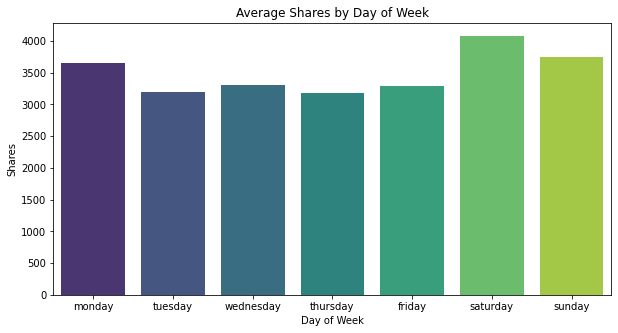

In [24]:
# Plot and save bar chart
plt.figure(figsize=(10,5))
sns.barplot(x='dayOfWeek', y='averageShares', data=weekday, palette='viridis', order=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])
plt.title("Average Shares by Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Shares')
plt.savefig('SharesPerWeekday.png')

### Findings

 - Question 1: Does the theme of the news article affect the number of shares on an online platform?
     - The theme of an article does affect the number of shares it recieves. As can be seen in the box plots, the themes, Social Media and Lifestyle, are the most written about topics. However, when considering average number of shares per article, Social Media, Technology and Lifestyle are the most shared. World related articles, in comparison, have fewer shares online as well as the lowest amount of articles written on this topic.
 - Question 2: Which theme is gaining in online popularity? 
     - The themes that show the highest gain in online popularity are Entertainment and World. As can be seen in the plot showing the peak shares over time, these two themes see an increase in number and size of peaks over time indicating their growing popularity. Lifestyle articles seem to be declining in shares over time. This plot shows that theme popularity is not a constant and keeps changing over time. 
 - Question 3: Is there a relationship between the polarity of the article and the number of shares it recieves?
     - After analyzing the articles based on a positive and negative polarity score, it can be seen that articles with high positive polarity recieve linearly higher shares. Articles with negative polarity, on the other hand, recieve fewer shares if they have a high negative polarity score. The negative polarity regression line is steeper than the positive polarity line indicating that extremely negative articles have a greater impact on losing shares than extremely positive articles have in gaining shares.
 - Question 4: Does the day an article was published impact the amount of shares it receives?
     - Plotting the average number of shares per article by each day of the week revealed that weekends including Saturdays and Sundays are days where article shares tend to be significantly higher as compared to weekdays. In terms, of weekdays, Mondays are the best days for articles recieving high shares online. This is interesting because the day after a weekend is Monday and the trend for sharing articles more frequently tends to tricle into Mondays.

### Discussion (Limitations and Implications)

The findings from this analysis has its share of limitations. The dataset contains some articles that are not categorized into any theme. I have excluded these articles from the analysis, however, the large number of articles that this unknown catgory encompasses can have an impact on the result of which theme produces higher number of shares online. Another limitation in this analysis is that the dataset only contains information on Mashable articles from January 2013 to January 2015. This is a span of 2 years. Although the findings for the report are accurate based on the years of data that were analyzed, using this analysis to make predictions may not be sufficient. 

The analysis has revealed many important implications that are useful to both content creators and publishers of Mashable. This website accepts content submissions and knowing which themes are gaining in popularity can help content creators develop articles based on the popular themes. Content creators can tailor the content of their articles to embed positive connotations to their articles. Removing negative words or tones from the title and body of the articles can improve the prospects of the article's performance in online platforms. This analysis revealed that the day an article is published affects how many shares it recieves. Publishers can use this insight to optimize the publishing process and prioritize which articles should be published when for greater reach.

### Conclusion

The goal of this analysis was to understand which factors affect how many shares an article recieves. The intent behind the research questions was to dive into various facets of articles and explore whether these factors can be controlled to produce the most online shares. After completing this analysis on articles by Mashable, it was revealed that there are controllable factors that affect an article's performance on online media platforms such as article theme, polarity of the content and publishing date. All of these factors affect how an article will fare and can be controlled to some extent. While certain themes are currently popular such as Social Media and Lifestyle, other themes are gaining popularity like World. It is important for publishers and content creators to keep a tab on current events and how they affect the themes which are most popular since this changes over time. Also, keeping the content and tone of the article positive will ensure it recieves more shares. The final aspect of articles which was analyzed in this report was publishing date. Weekends have shown to be more effective for sharing articles online as compared to weekdays.

### References

[[1]](https://doi.org/10.1111/jcom.12232) Jonathan Bright, The Social News Gap: How News Reading and News Sharing Diverge, Journal of Communication, Volume 66, Issue 3, June 2016, Pages 343–365, https://doi.org/10.1111/jcom.12232